In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
plt.rcParams['figure.figsize'] = (12, 8)

import seaborn as sns

In [2]:
data = pd.read_csv("appliance_profiles_cleared.csv", index_col = 0)
data["ts"] = pd.to_timedelta(data["ts"]).dt.total_seconds()

In [3]:
Pmean, Pstd = None, None
Qmean, Qstd = None, None

def calc_mean_and_std():
    train = pd.read_csv("train.csv")
    trP = train["G. mkS"].to_numpy()
    trQ = train["B. mkS"].to_numpy()
    
    test = pd.read_csv("test.csv")
    tsP = test["G. mkS"].to_numpy()
    tsQ = test["B. mkS"].to_numpy()
    
    P = np.concatenate((trP, tsP))
    Q = np.concatenate((trQ, tsQ))
    
    global Pmean, Pstd
    global Qmean, Qstd
    
    Pmean, Pstd = P.mean(), P.std()
    Qmean, Qstd = Q.mean(), Q.std()
    
calc_mean_and_std()

print(Pmean, Pstd)
print(Qmean, Qstd)

6990.027586309523 13326.914007427507
786.3513288690476 1160.2942349207901


In [4]:
data["P"] = data["G (mkS)"] / Pstd
data["Q"] = data["B (mkS)"] / Qstd

In [5]:
def draw(devices):
    for device in devices:
        trial1 = data.query(f"class_trial_description == '{device} 1'")
        trial2 = data.query(f"class_trial_description == '{device} 2'")
        
        prop = "G (mkS)"
        plt.plot(trial1["ts"] - trial1["ts"].min(), trial1[prop])
        plt.plot(trial2["ts"] - trial2["ts"].min(), trial2[prop])
        
        prop = "B (mkS)"
        plt.plot(trial1["ts"] - trial1["ts"].min(), trial1[prop])
        plt.plot(trial2["ts"] - trial2["ts"].min(), trial2[prop])
        
        plt.grid()
        plt.title(device)
        plt.show()


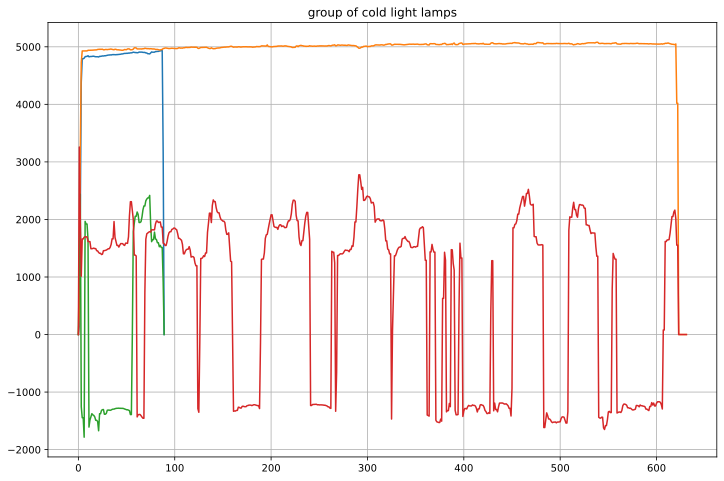

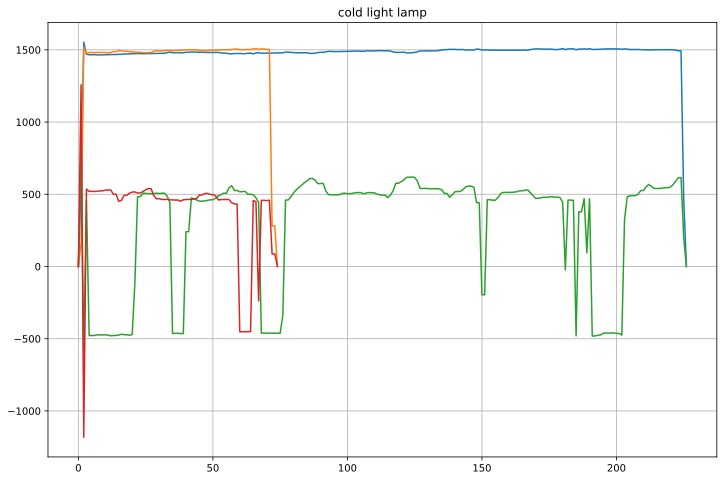

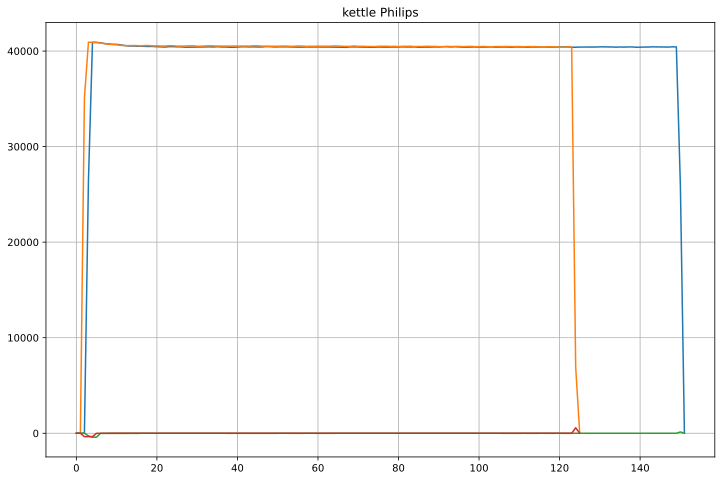

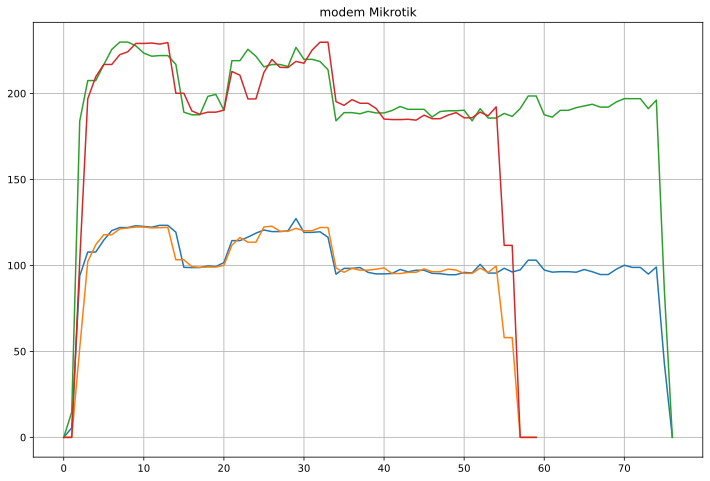

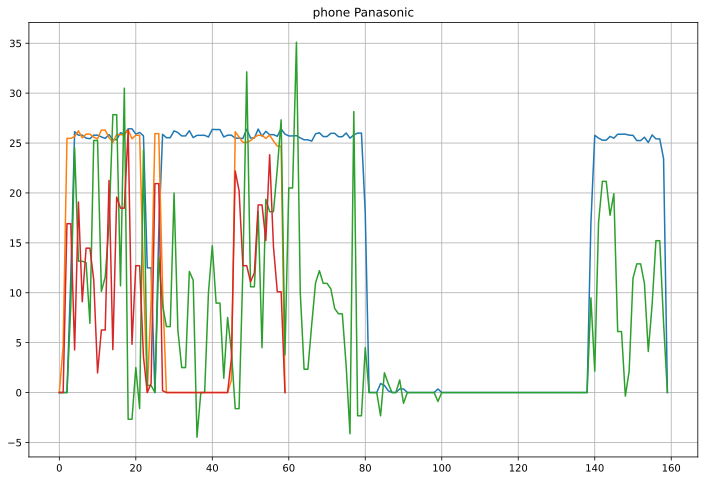

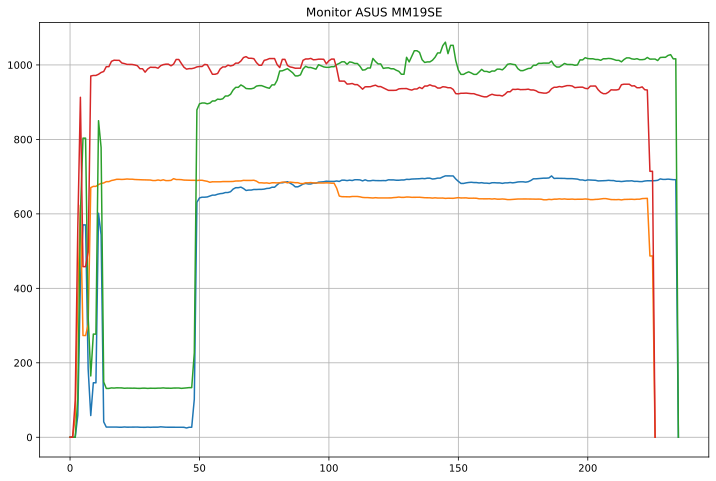

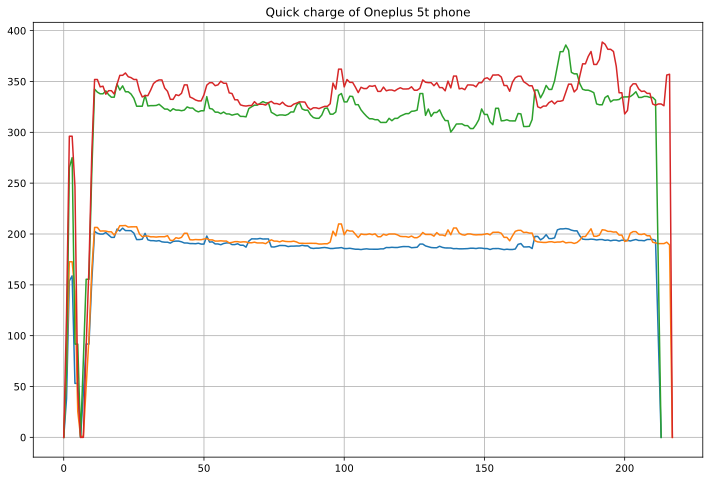

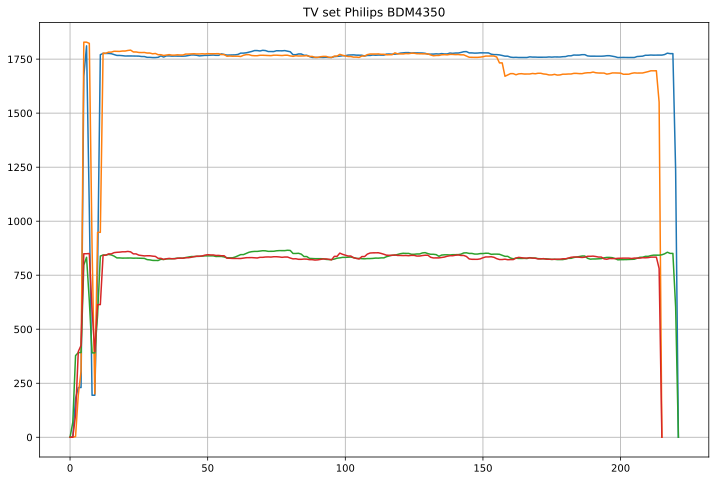

In [6]:
draw([
    "group of cold light lamps",
    "cold light lamp",
    "kettle Philips",
    "modem Mikrotik",
    "phone Panasonic",
    "Monitor ASUS MM19SE",
    "Quick charge of Oneplus 5t phone",
    "TV set Philips BDM4350"
])

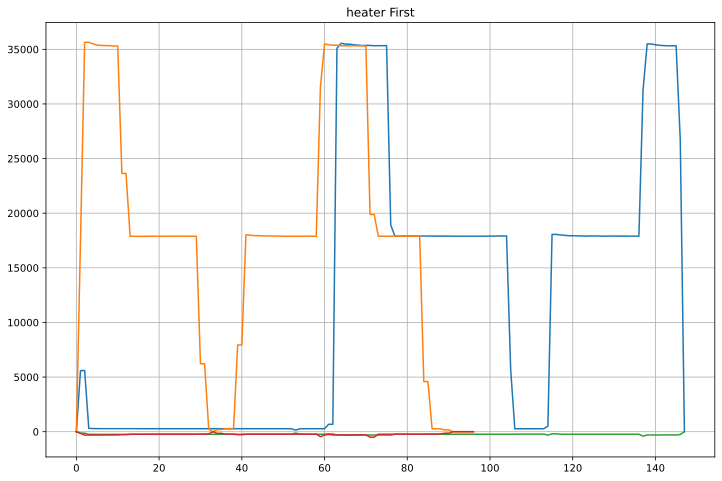

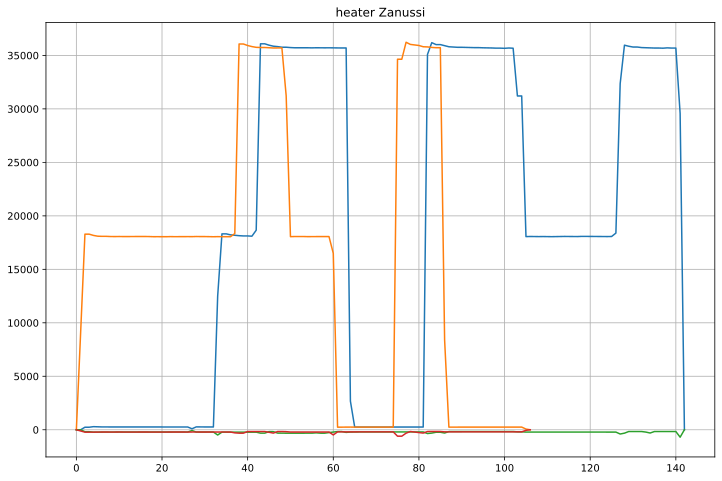

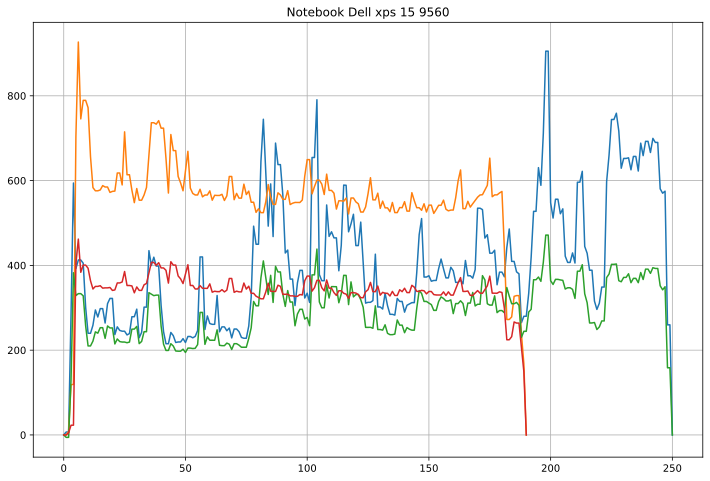

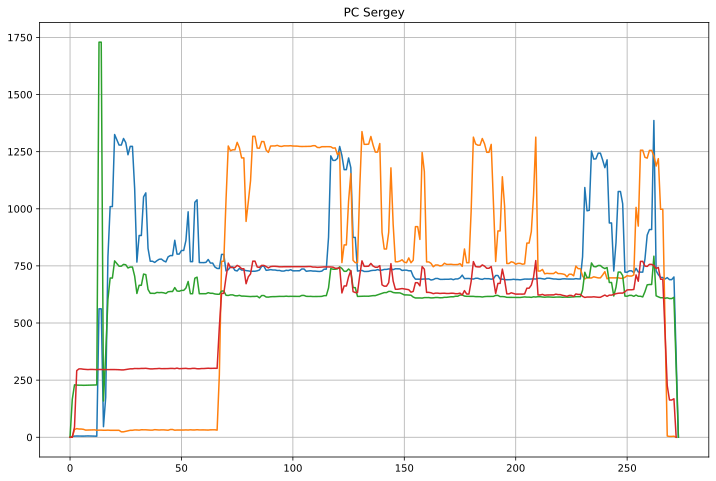

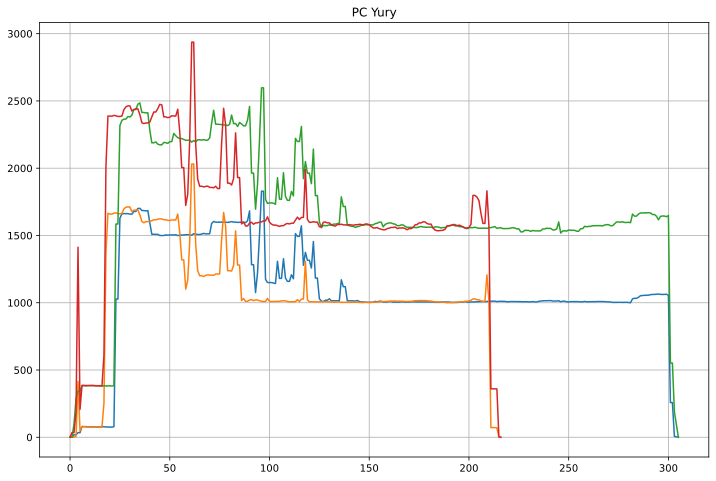

In [7]:
draw([
    "heater First",
    "heater Zanussi",
    "Notebook Dell xps 15 9560",
    "PC Sergey",
    "PC Yury"
])

In [8]:
def draw_scaled(devices, values):
    assert(len(devices) == len(values))
    
    for device, (pval, qval) in zip(devices, values):
        trial1 = data.query(f"class_trial_description == '{device} 1'")
        trial2 = data.query(f"class_trial_description == '{device} 2'")

        prop = "P"
        plt.plot(trial1["ts"] - trial1["ts"].min(), trial1[prop])
        plt.plot(trial2["ts"] - trial2["ts"].min(), trial2[prop])
        
        prop = "Q"
        plt.plot(trial1["ts"] - trial1["ts"].min(), trial1[prop])
        plt.plot(trial2["ts"] - trial2["ts"].min(), trial2[prop])
        
        plt.plot(
            [0, max(trial1["ts"].max() - trial1["ts"].min(), trial2["ts"].max() - trial2["ts"].min())],
            [pval, pval]
        )
        
        plt.plot(
            [0, max(trial1["ts"].max() - trial1["ts"].min(), trial2["ts"].max() - trial2["ts"].min())],
            [qval, qval]
        )

        plt.grid()
        plt.title(device)
        plt.show()


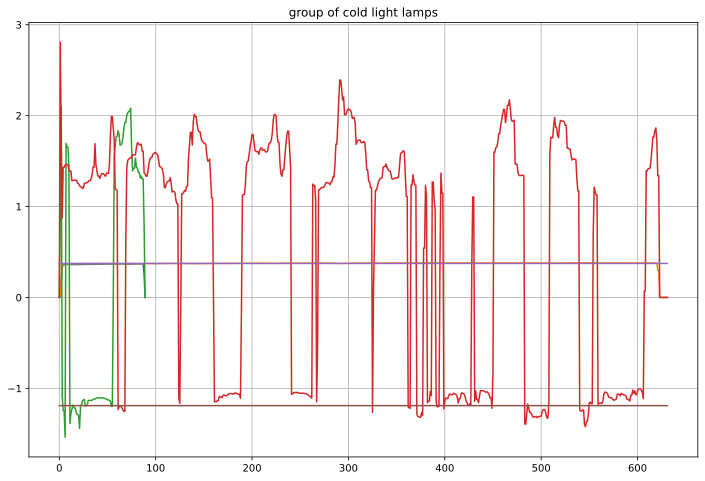

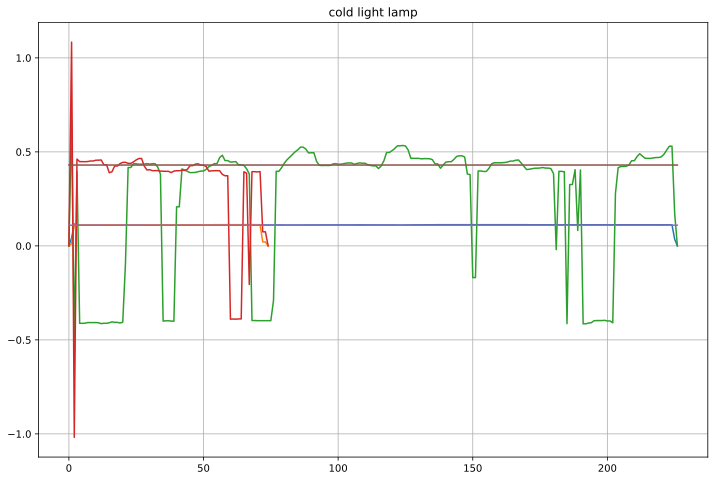

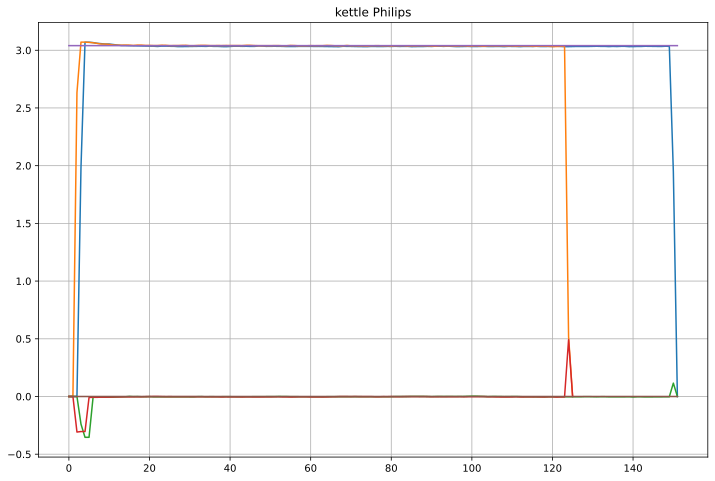

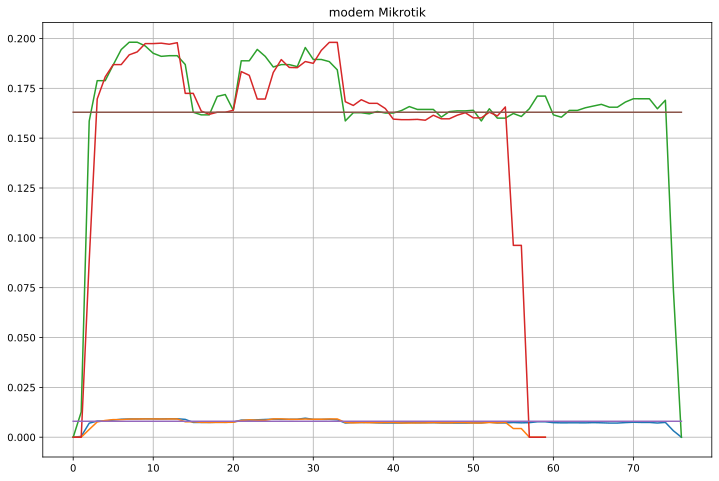

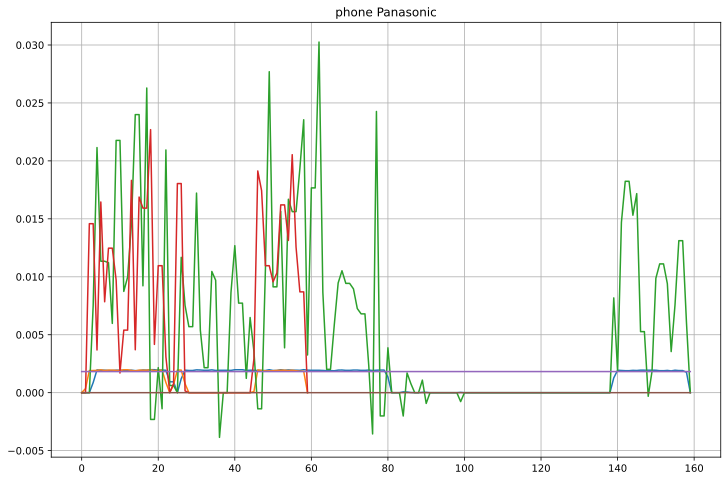

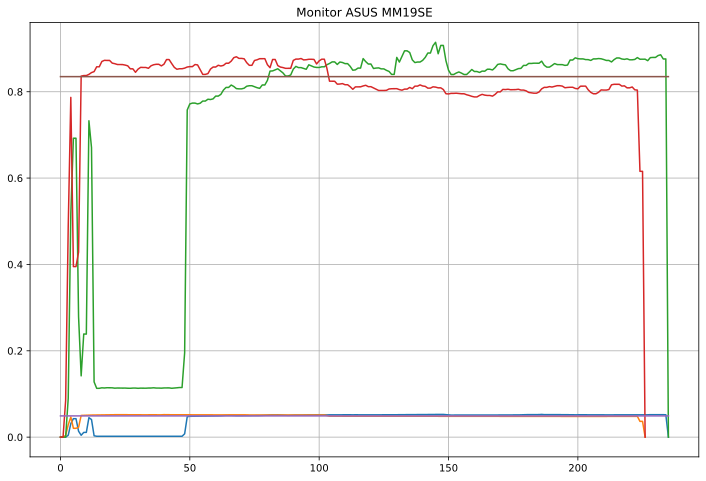

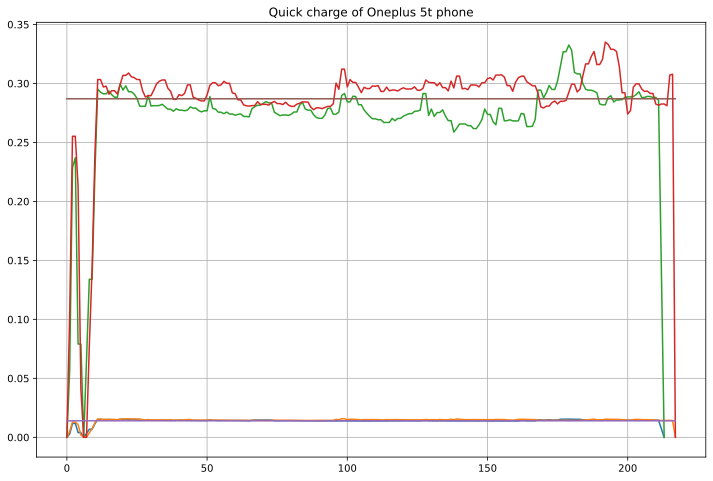

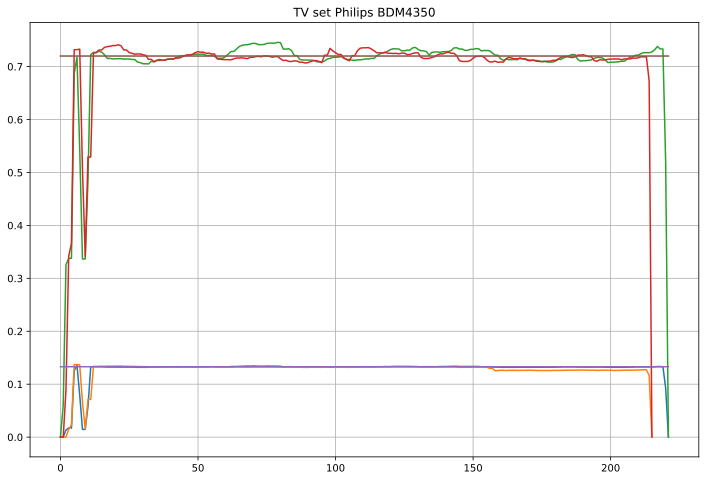

In [9]:
draw_scaled([
    "group of cold light lamps",
    "cold light lamp",
    "kettle Philips",
    "modem Mikrotik",
    "phone Panasonic",
    "Monitor ASUS MM19SE",
    "Quick charge of Oneplus 5t phone",
    "TV set Philips BDM4350"
], [
    (0.374,  -1.19),
    (0.11,    0.43),
    (3.04,    0.0),
    (0.008,   0.163),
    (0.00182, 0.0),
    (0.0492,  0.835),
    (0.014,   0.287),
    (0.133,   0.72)
])

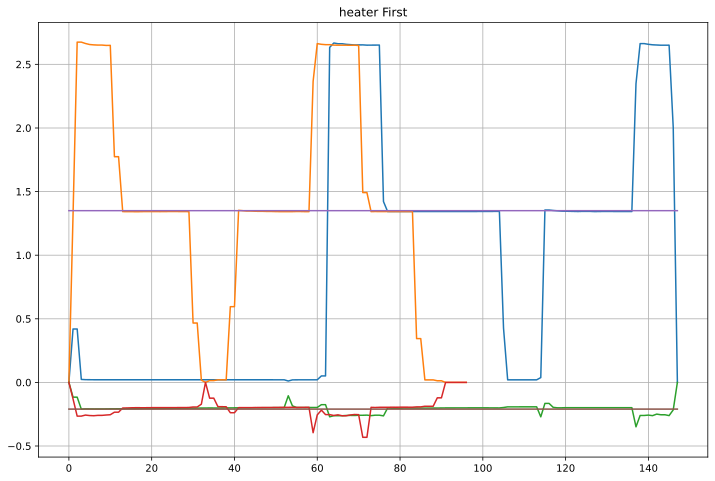

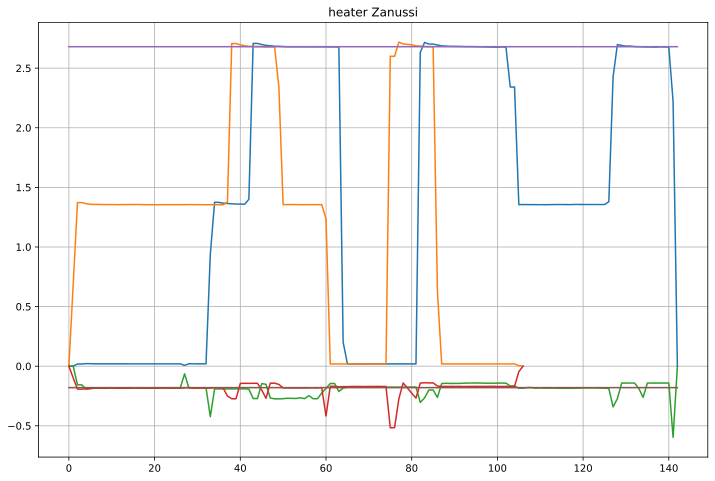

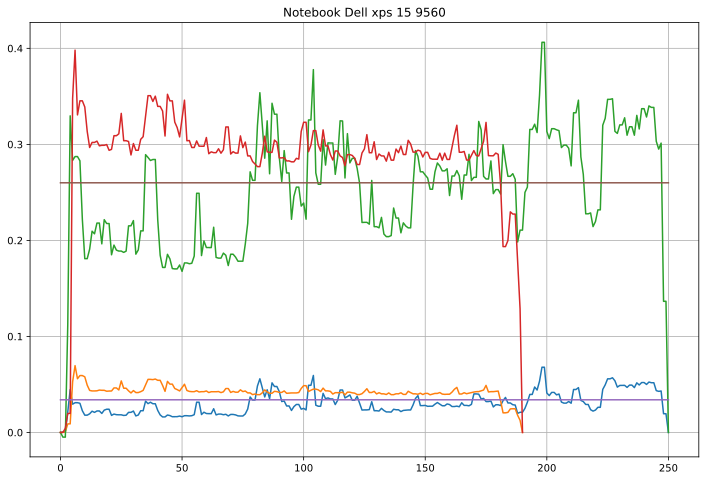

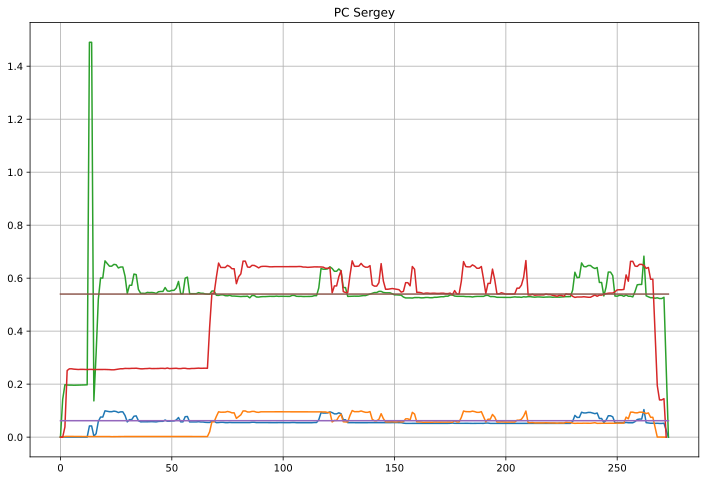

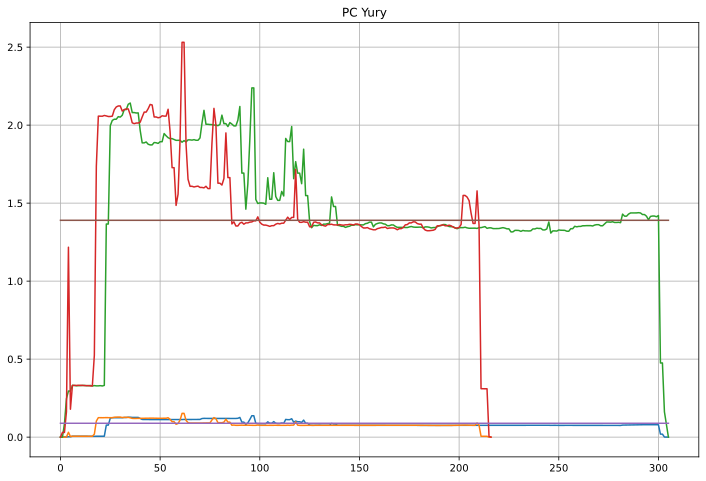

In [10]:
draw_scaled([
    "heater First",
    "heater Zanussi",
    "Notebook Dell xps 15 9560",
    "PC Sergey",
    "PC Yury"
], [
    (1.35, -0.21),
    (2.68, -0.18),
    (0.034, 0.26),
    (0.062, 0.54),
    (0.089, 1.39)
])

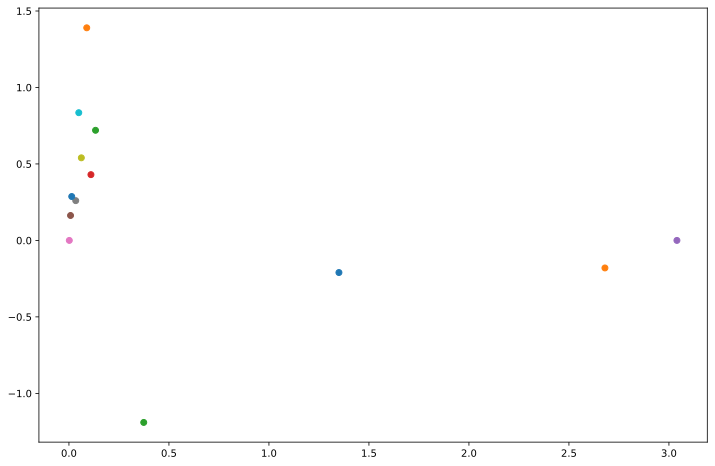

In [11]:
synth_values = [
    (1.35,   -0.21),  # "heater First"                       1
    (2.68,   -0.18),  # "heater Zanussi"                     2
    (0.374,  -1.19),  # "group of cold light lamps"          3
    (0.11,    0.43),  # "cold light lamp"                    4
    (3.04,    0.0),   # "kettle Philips"                     5
    (0.008,   0.163), # "modem Mikrotik"                     6
    (0.00182, 0.0),   # "phone Panasonic"                    7
    (0.034,   0.26),  # "Notebook Dell xps 15 9560"          8
    (0.062,   0.54),  # "PC Sergey"                          9
    (0.0492,  0.835), # "Monitor ASUS MM19SE"                10
    (0.014,   0.287), # "Quick charge of Oneplus 5t phone"   11
    (0.089,   1.39),  # "PC Yury"                            12
    (0.133,   0.72)   # "TV set Philips BDM4350"             13
]

for x, y in synth_values:
    plt.scatter(x, y)

In [12]:
N_classes = 13

train = pd.read_csv("train.csv")
train["ts"] = pd.to_timedelta(train["ts"]).dt.total_seconds()

test = pd.read_csv("test.csv")
test["ts"] = pd.to_timedelta(test["ts"]).dt.total_seconds()

for i in range(1, N_classes + 1):
    train[f"class{i}"] = train[f"class{i}"].fillna(0.0).astype(int)

train["P"] = train["G. mkS"] / Pstd
train["Q"] = train["B. mkS"] / Qstd

test["P"] = test["G. mkS"] / Pstd
test["Q"] = test["B. mkS"] / Qstd


In [13]:
train["mask"] = 0
for i in range(1, N_classes + 1):
    train["mask"] += train[f"class{i}"] * 2 ** (i - 1)


In [14]:
def gen_synthetic_train():
    global synth_values
    
    P_list, Q_list, mask_list = [], [], []
    
    for mask in range(2 ** N_classes):
        curP, curQ = 0.0, 0.0
        
        for i, (p, q) in enumerate(synth_values):
            if (mask & (2 ** i)):
                curP += p
                curQ += q
        
        P_list.append(curP)
        Q_list.append(curQ)
        mask_list.append(mask)
    
    synth_train = pd.DataFrame({"P": P_list, "Q": Q_list, "mask": mask_list})
    
    return synth_train


synth_train = gen_synthetic_train()

In [15]:
train = pd.concat((train, synth_train))

for i in range(1, N_classes + 1):
    train[f"class{i}"] = train[f"class{i}"].fillna(0.0).astype(int)

train.shape

(11312, 19)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

class MyKNN(KNeighborsClassifier):
    
    def fit(self, X, y):
        if (type(X) != np.ndarray):
            self.X = X.to_numpy()
        else:
            self.X = X
        
        if (type(y) != np.ndarray):
            self.y = y.to_numpy()
        else:
            self.y = y

        base_est = super().fit(X, y)
        assert(np.unique(self.y).size == self.classes_.size)
        return base_est
    
    
    def predict_proba(self, X):
        distances, indices = self.kneighbors(X)
        probas = super().predict_proba(X)
        classes = np.sort(self.classes_)
        
        for i, (dist, ind) in enumerate(zip(distances, indices)):
            w = np.full(self.classes_.size, 0.0)
            
            for j in range(ind.size):
                pos = np.searchsorted(classes, self.y[ind[j]])
                w[pos] += 1 / (1 + dist[j])
            
            probas[i] *= w
            probas[i] /= probas[i].sum()
                
        return probas
    
    
    def predict(self, X):
        return self.predict_proba(X).argmax(axis = 1)

    
my_knn = MyKNN(n_neighbors = 10, algorithm = "brute")
my_knn.fit(train[["P", "Q"]], train["mask"])

MyKNN(algorithm='brute', n_neighbors=10)

In [17]:
from collections import deque

def predict_translations(est, train, test, threshold):
    probas = est.predict_proba(test[["P", "Q"]])
    test["mask"] = -1
    
    mask = probas.max(axis = 1) >= threshold
    assert(mask.any())
    test.loc[mask, "mask"] = probas[mask].argmax(axis = 1)
    
    q = deque()
    for i in range(mask.size):
        if (not mask[i]):
            continue
            
        if (i > 0 and not mask[i - 1]):
            q.append((i - 1, 'l'))
        
        if (i + 1 < mask.size and not mask[i + 1]):
            q.append((i + 1, 'r'))
    
    print(mask.sum(), "considered to be good")
    
    while (len(q) > 0):
        i, d = q.popleft()
        if (mask[i]):
            continue
        
        mask[i] = True
        
        sh = 1 if (d == 'l') else -1
        sh_mask = test.loc[i + sh, "mask"]
        
        best = sh_mask
        for j in range(N_classes):
            if (probas[i][best] < probas[i][sh_mask ^ (2 ** j)]):
                best = sh_mask ^ (2 ** j)
        
        test.at[i, "mask"] = best
        
        if (i > 0 and not mask[i - 1]):
            q.append((i - 1, 'l'))
        
        if (i + 1 < mask.size and not mask[i + 1]):
            q.append((i + 1, 'r'))
        
    assert(mask.all() and test.query("mask == -1").shape[0] == 0)


In [18]:
predict_translations(my_knn, train, test, 0.9)

print(test.shape[0], test.query("mask != 0").shape[0])

2282 considered to be good
3600 2309


In [19]:
sub = pd.read_csv("submission-template.csv")
sub["mask"] = test["mask"]

for i in range(1, N_classes + 1):
    sub[f"class{i}"] = (sub["mask"] // 2 ** (i - 1)) % 2
    
sub.drop(columns = "mask").to_csv("submission.csv", index = False)